In [1]:
import matplotlib.pyplot as plt
import soda

In [2]:
lat = 33.9533
lon = -117.3962

site = soda.SolarSite(lat,lon)

In [3]:
year = "2015"
leap_year = False
interval = "30"
utc = False
df = site.get_nsrdb_data(year,leap_year,interval,utc)

C:\Users\Ignac\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'GHI (W/$m^2$)')

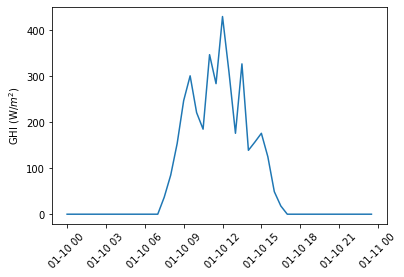

In [4]:
date = "2015-01-10"

plt.plot(df["GHI"].loc[date])
plt.xticks(rotation=45)
plt.ylabel("GHI (W/$m^2$)")

In [5]:
clearsky = False
capacity = 1
DC_AC_ratio = 1.2
tilt = 33
azimuth = 180
inv_eff = 96
losses = 15
array_type = 0

pwr = site.generate_solar_power_from_nsrdb(clearsky,capacity,DC_AC_ratio,tilt,azimuth,inv_eff,losses,array_type)

Text(0, 0.5, 'AC power (MW)')

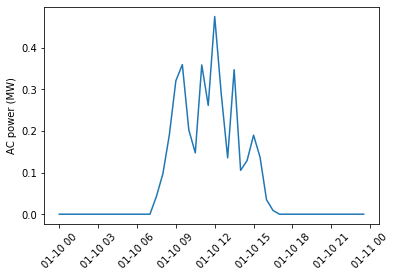

In [6]:
plt.plot(pwr[date])
plt.xticks(rotation=45)
plt.ylabel("AC power (MW)")

In [7]:
resolution = "5S"

solar_data = site.generate_high_resolution_power_data(resolution, date)

C:\Users\Ignac\Dropbox (ASU)\Ignacio\Python\CIGAR\SODA\soda\solar_data.py:196: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df["CloudType"] = ct[df.index]


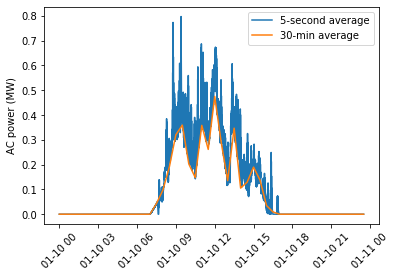

In [8]:
plt.plot(solar_data,label="5-second average")
plt.plot(pwr[date],label="30-min average")
plt.xticks(rotation=45)
plt.ylabel("AC power (MW)")
plt.legend()